In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np


In [8]:
data=pd.read_excel('D:/Downloads\Analytics Associate Interview test.xlsx',sheet_name='data')

In [9]:
data.head()

,Date,Agent name,Response,uid,Converted?,average payment delay before weekly (days),revenue per day before weekly,revenue per day after weekly
0,2023-08-06,Rose Kanyiri,No-financial constraints,126022,No,2,43,43
1,2023-07-06,Allan Mutuota,No- low priority,101372,No,1,33,33
2,2023-07-05,Greyson Ochanda,No- low priority,104620,No,5,28,28
3,2023-08-31,Allan Mutuota,No- service dissatisfaction,28997,No,3,41,41
4,2023-09-13,Rose Kanyiri,No- low priority,76405,No,4,29,29


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Date                                        1961 non-null   datetime64[ns]
 1   Agent name                                  1961 non-null   object        
 2   Response                                    1961 non-null   object        
 3   uid                                         1961 non-null   int64         
 4   Converted?                                  1961 non-null   object        
 5   average payment delay before weekly (days)  1961 non-null   int64         
 6   revenue per day before weekly               1961 non-null   int64         
 7   revenue per day after weekly                1961 non-null   int64         
 8   DayOfWeek                                   1961 non-null   object        
 9   total_re

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,1961.0,84629.064763,32232.518042,336.0,60022.0,89575.0,110842.0,134765.0
average payment delay before weekly (days),1961.0,3.949516,2.006622,1.0,2.0,4.0,6.0,7.0
revenue per day before weekly,1961.0,35.932177,8.258020,22.0,29.0,36.0,43.0,50.0
revenue per day after weekly,1961.0,36.681285,8.621219,22.0,29.0,37.0,44.0,57.0
total_revenue_before_weekly,1961.0,141.310046,79.716012,22.0,76.0,132.0,198.0,350.0
total_revenue_after_weekly,1961.0,144.328914,82.260453,22.0,78.0,132.0,200.0,399.0
total_revenue,1961.0,141.310046,79.716012,22.0,76.0,132.0,198.0,350.0


In [31]:
data.isnull().sum()

Date                                          0
Agent name                                    0
Response                                      0
uid                                           0
Converted?                                    0
average payment delay before weekly (days)    0
revenue per day before weekly                 0
revenue per day after weekly                  0
DayOfWeek                                     0
total_revenue_before_weekly                   0
total_revenue_after_weekly                    0
total_revenue                                 0
dtype: int64

Conversion Rate:
 No     94.084651
Yes     5.915349
Name: Converted?, dtype: float64
Conversion Rate by Delay:
 Converted?                                        No       Yes
average payment delay before weekly (days)                    
1                                           0.949153  0.050847
2                                           0.930909  0.069091
3                                           0.931818  0.068182
4                                           0.942966  0.057034
5                                           0.958801  0.041199
6                                           0.950355  0.049645
7                                           0.922509  0.077491


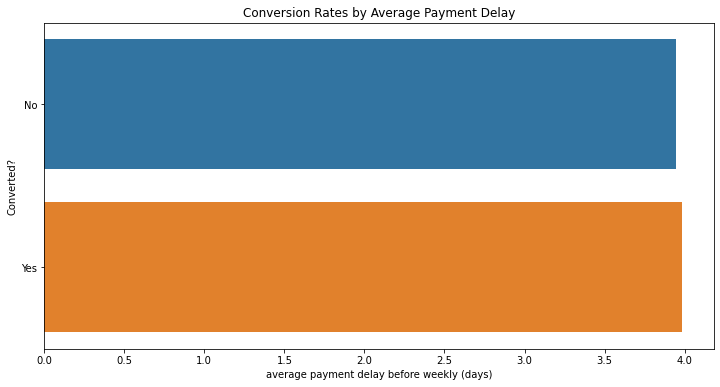

Reachability by Day of the Week:
 Response   No- low priority  No- service dissatisfaction  \
DayOfWeek                                                  
Friday             0.347134                     0.028662   
Monday             0.302682                     0.038314   
Saturday           0.311864                     0.040678   
Sunday             0.291367                     0.043165   
Thursday           0.332192                     0.044521   
Tuesday            0.333333                     0.020325   
Wednesday          0.294545                     0.054545   

Response   No-financial constraints  Not reachable  Yes- affordable  
DayOfWeek                                                            
Friday                     0.171975       0.073248         0.378981  
Monday                     0.187739       0.076628         0.394636  
Saturday                   0.122034       0.047458         0.477966  
Sunday                     0.133094       0.082734         0.449640  
Thurs

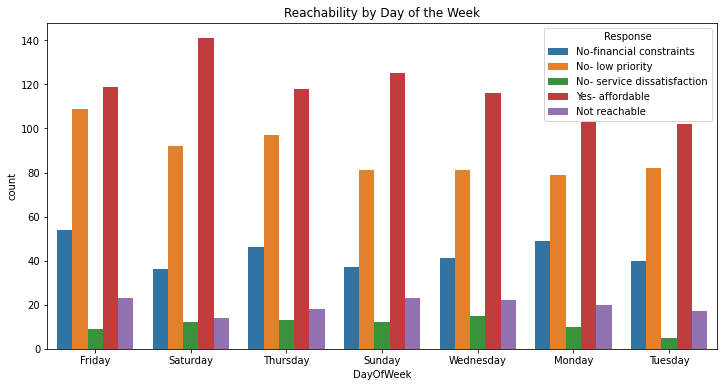

Agent Performance:
 Converted?             No       Yes
Agent name                         
Allan Mutuota    0.955446  0.044554
Greyson Ochanda  0.950413  0.049587
Lutta Mboya      0.877333  0.122667
Rose Kanyiri     0.961694  0.038306


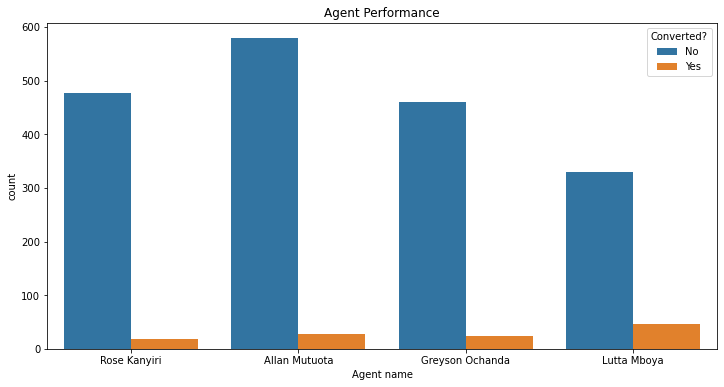

In [23]:
# #1. Analyse the data to understand customer conversion, reachability of customers by day of week, as well as individual agent perfomance.

# Customer Conversion Analysis
conversion_rate = data['Converted?'].value_counts(normalize=True) * 100
print("Conversion Rate:\n", conversion_rate)

conversion_by_delay = data.groupby('average payment delay before weekly (days)')['Converted?'].value_counts(normalize=True).unstack()
print("Conversion Rate by Delay:\n", conversion_by_delay)

plt.figure(figsize=(12, 6))
sns.barplot(x='average payment delay before weekly (days)', y='Converted?', data=data, ci=None)
plt.title('Conversion Rates by Average Payment Delay')
plt.show()

# Reachability Analysis by Day of Week
data['DayOfWeek'] = pd.to_datetime(data['Date']).dt.day_name()
reachability_by_day = data.groupby('DayOfWeek')['Response'].value_counts(normalize=True).unstack()
print("Reachability by Day of the Week:\n", reachability_by_day)

plt.figure(figsize=(12, 6))
sns.countplot(x='DayOfWeek', hue='Response', data=data, order=data['DayOfWeek'].value_counts().index)
plt.title('Reachability by Day of the Week')
plt.show()

# Individual Agent Performance Analysis
agent_performance = data.groupby('Agent name')['Converted?'].value_counts(normalize=True).unstack()
print("Agent Performance:\n", agent_performance)

plt.figure(figsize=(12, 6))
sns.countplot(x='Agent name', hue='Converted?', data=data)
plt.title('Agent Performance')
plt.show()

Customer Retention Percentage:
 No     94.084651
Yes     5.915349
Name: Converted?, dtype: float64


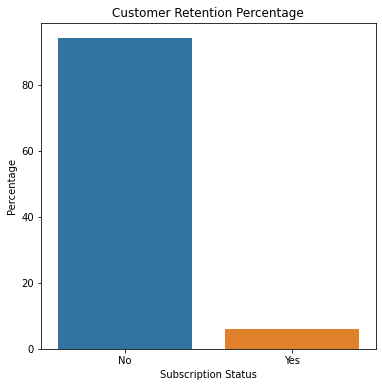

Non-Renewal Reasons:
 Yes- affordable                708
No- low priority               621
No-financial constraints       303
Not reachable                  137
No- service dissatisfaction     76
Name: Response, dtype: int64


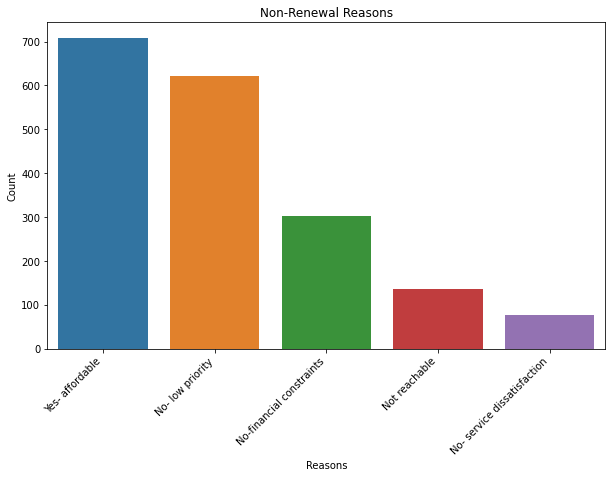

Conversion by Response Category:
 Converted?                         No       Yes
Response                                       
No- low priority             1.000000       NaN
No- service dissatisfaction  1.000000       NaN
No-financial constraints     1.000000       NaN
Not reachable                1.000000       NaN
Yes- affordable              0.859223  0.140777


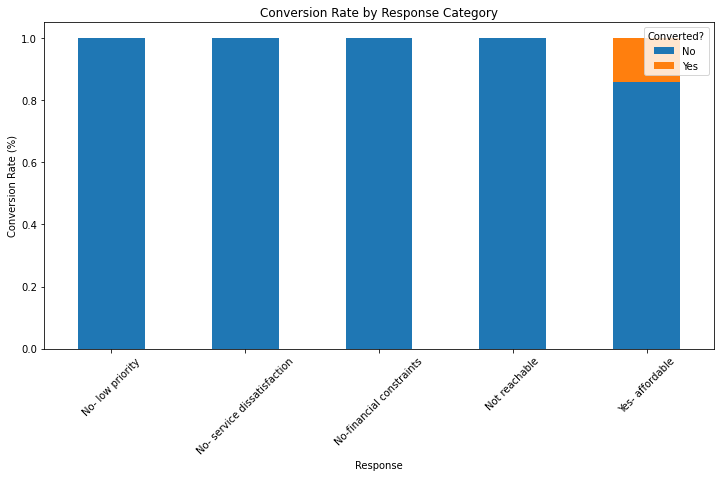

Average Revenue per Customer: 141.31004589495154


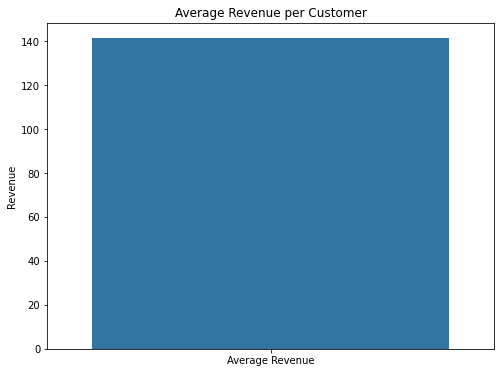

Strongest Positive Corr:
total_revenue_before_weekly                   1.000000
total_revenue                                 1.000000
total_revenue_after_weekly                    0.977264
average payment delay before weekly (days)    0.891131
revenue per day before weekly                 0.371393
Name: total_revenue, dtype: float64
Strong negative corr:
uid                                           0.039424
revenue per day after weekly                  0.336285
revenue per day before weekly                 0.371393
average payment delay before weekly (days)    0.891131
total_revenue_after_weekly                    0.977264
Name: total_revenue, dtype: float64


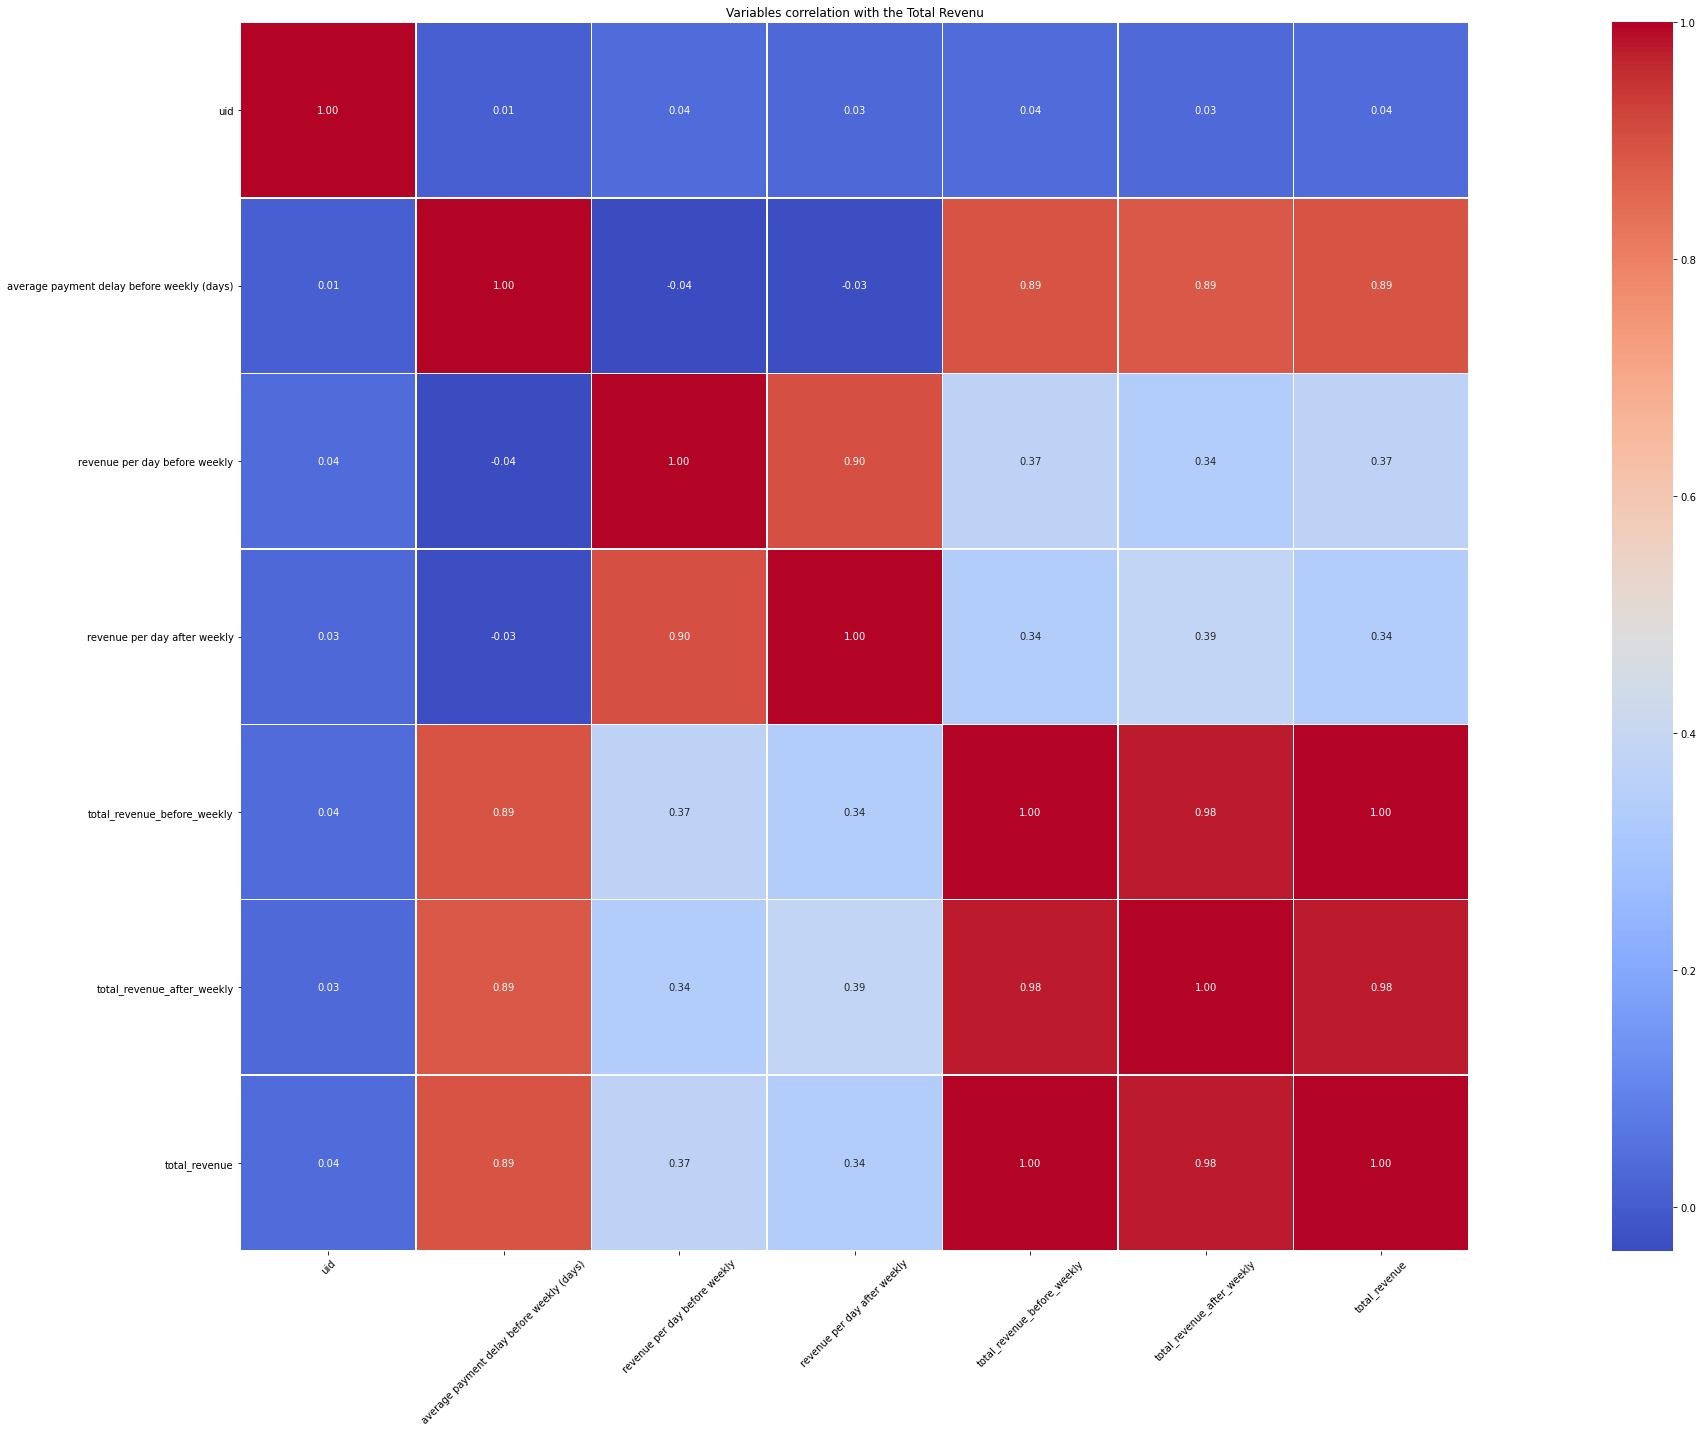

In [42]:
# Customer Retention Analysis
# Customer Retention Percentage
retention_percentage = data['Converted?'].value_counts(normalize=True) * 100
print("Customer Retention Percentage:\n", retention_percentage)

# Visualization for Customer Retention Percentage
plt.figure(figsize=(6, 6))
sns.barplot(x=retention_percentage.index, y=retention_percentage.values)
plt.title('Customer Retention Percentage')
plt.xlabel('Subscription Status')
plt.ylabel('Percentage')
plt.show()

# Non-Renewal Reasons
non_renewal_reasons = data[data['Converted?'] == 'No']['Response'].value_counts()
print("Non-Renewal Reasons:\n", non_renewal_reasons)

# Visualization for Non-Renewal Reasons
plt.figure(figsize=(10, 6))
sns.barplot(x=non_renewal_reasons.index, y=non_renewal_reasons.values)
plt.title('Non-Renewal Reasons')
plt.xlabel('Reasons')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
# Conversion by Response Category
conversion_by_response = data.groupby('Response')['Converted?'].value_counts(normalize=True).unstack()
print("Conversion by Response Category:\n", conversion_by_response)

# Visualization
conversion_by_response_plot = conversion_by_response.plot(kind='bar', stacked=True, figsize=(12, 6))
conversion_by_response_plot.set_ylabel('Conversion Rate (%)')
conversion_by_response_plot.set_title('Conversion Rate by Response Category')
plt.xticks(rotation =45)
plt.show()
# Average Revenue per Customer
data['total_revenue'] = data['average payment delay before weekly (days)'] * data['revenue per day before weekly']
average_revenue_per_customer = data['total_revenue'].mean()
print("Average Revenue per Customer:", average_revenue_per_customer)

# Visualization for Average Revenue per Customer
plt.figure(figsize=(8, 6))
sns.barplot(x=['Average Revenue'], y=[average_revenue_per_customer])
plt.title('Average Revenue per Customer')
plt.ylabel('Revenue')
plt.show()
#Corrrelation of other Variables with Total Revenue
correlation_data = data.corr()
strongest_pos_corr_saleprice = correlation_data['total_revenue'].sort_values(ascending=False).head(5)
strongest_corr_neg_saleprice = correlation_data['total_revenue'].sort_values(ascending=True).head(5)

plt.figure(figsize=(40, 20))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True)

plt.title('Variables correlation with the Total Revenu')
plt.xticks(rotation=45)
#plt.yticks(rotation=45)

plt.tight_layout()
print('Strongest Positive Corr:')
print(strongest_pos_corr_saleprice)
print('Strong negative corr:')
print(strongest_corr_neg_saleprice)
plt.show()